<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 171.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 149.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 155.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 150.4 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
df[df.duplicated(keep='first')] # The keep parameter when set to 'first' keeps the first occurrences and only outputs duplicate ('last' occurrences) rows.

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
65442,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65443,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
65444,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
65445,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
65446,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
duplicate_rows = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)]
duplicate_rows['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                       39048
Independent contractor, freelancer, or self-employed                                                                                                                       4845
Student, full-time                                                                                                                                                         4713
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                   3558
Not employed, but looking for work                                                                                                                                         2341
                                                                                                             

In [8]:
duplicate_rows['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50173
I am not primarily a developer, but I write code sometimes as part of my work/studies     6471
I am learning to code                                                                     3847
I code primarily as a hobby                                                               3317
I used to be a developer by profession, but no longer am                                  1482
Name: count, dtype: int64

In [9]:
duplicate_rows['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    22977
Remote                                  20788
In-person                               10925
Name: count, dtype: int64

Analysis of duplicate rows based on MainBranch, Employment, and RemoteWork shows that demographic attributes such as age group, education level, and job satisfaction tend to have low variability, indicating similar characteristics across these rows. In contrast, technical experience variables including programming languages, tools, and platforms exhibit high variability, demonstrating that individuals with similar employment profiles can have very different technical skill sets.

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


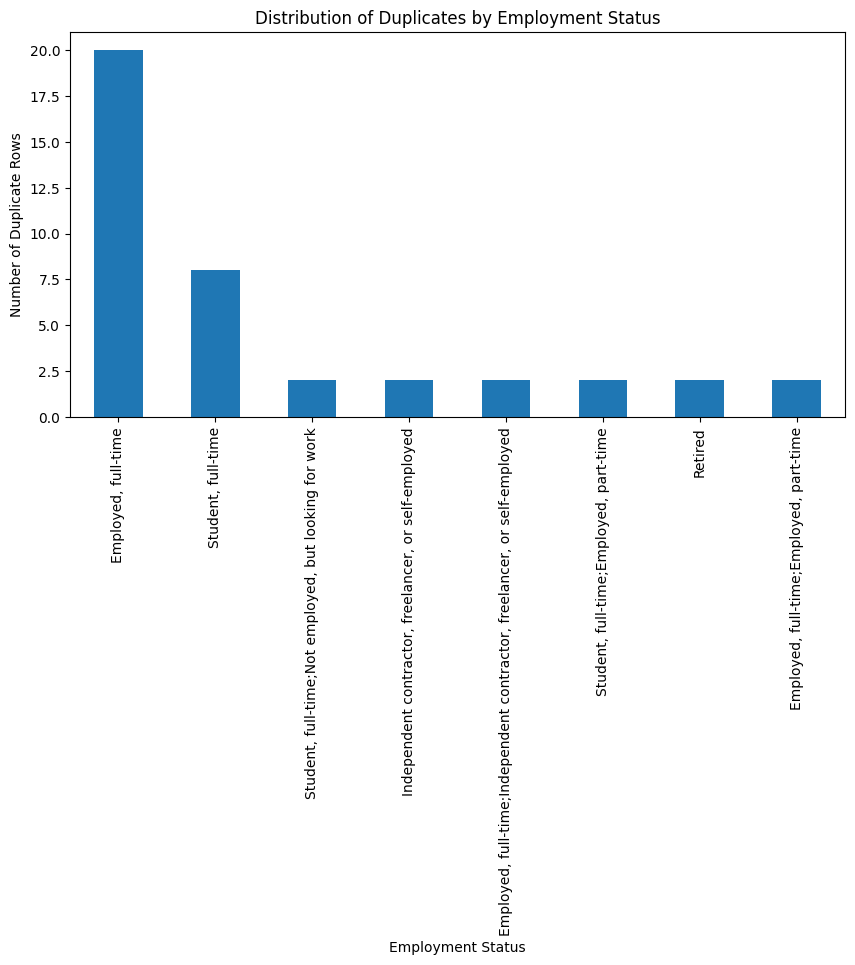

In [10]:
# Filter for duplicates
dupes = df[df.duplicated(keep=False)]

# Plot the distribution by Employment
du_count = dupes['Employment'].value_counts()
du_count.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Duplicates by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Duplicate Rows')
plt.show()

In [11]:
du_country = dupes['Country'].value_counts().to_frame()
du_country.reset_index(inplace=True)

Replacing long names with short forms

In [12]:
du_country.at[1, 'Country'] = 'UK'
du_country.at[0, 'Country'] = 'USA'
du_country.at[8, 'Country'] = 'Iran'

In [13]:
du_country.set_index('Country', inplace=True)

In [14]:
du_country.columns

Index(['count'], dtype='object')

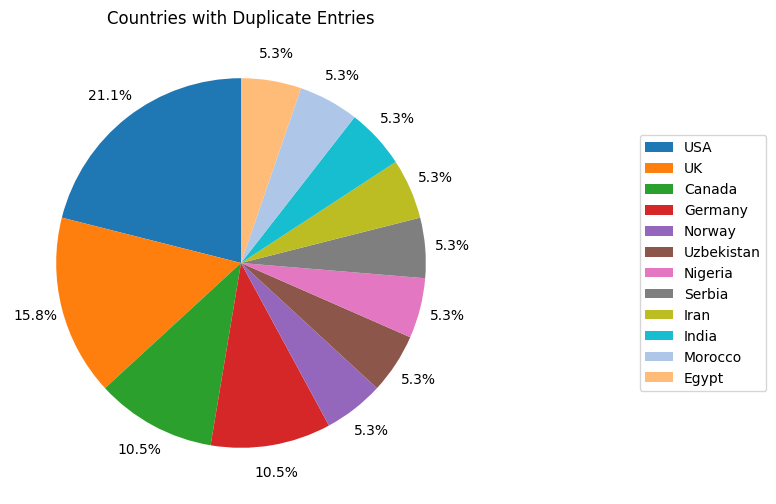

In [15]:

du_country.plot(y='count', 
                kind='pie', 
                autopct='%1.1f%%', 
                pctdistance=1.15, 
                labels=None,
                startangle=90,
                colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # olive
    "#17becf",  # cyan
    "#aec7e8",  # light blue
    "#ffbb78"   # light orange
]
,
                figsize=(10, 6))

plt.title('Countries with Duplicate Entries')
plt.ylabel('') # Hides the column name for a cleaner look
plt.legend(labels=du_country.index, bbox_to_anchor=(1.5, 0.5), loc='center')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [16]:
# Write your code here

list(df.columns)

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [21]:
pd.reset_option('display.max_rows', None)
df.isna().sum().sort_values().head(15)

ResponseId                   0
MainBranch                   0
Age                          0
Employment                   0
Check                        0
AISelect                  4531
EdLevel                   4654
LearnCode                 4950
NEWSOSites                5151
YearsCode                 5570
LanguageHaveWorkedWith    5694
SOAccount                 5878
SOVisitFreq               5902
DevType                   5994
SOComm                    6276
dtype: int64

In [39]:
# 1. Define the strategic subset based on your NaN analysis
# We use columns with 0 NaNs to ensure the comparison is accurate
strategic_subset1 = ['MainBranch', 'Age', 'Employment', 'Country']

print(f"Total duplicate rows with subset 1: {df.duplicated(subset=strategic_subset1).sum()}")


Total duplicate rows with subset 1: 56214


In [40]:

strategic_subset2 = ['MainBranch', 'Age', 'Employment', 'Country', 'EdLevel', 'YearsCode', 'DevType']

print(f"Total duplicate rows with subset 2: {df.duplicated(subset=strategic_subset2).sum()}")

Total duplicate rows with subset 2: 18618


In [43]:
# simply using the most reliable method
print(f'Shape before removing duplicates: {df.shape}')
df.drop_duplicates(subset=['ResponseId'], keep='first', inplace=True)
print(f'Shape after removing duplicates: {df.shape}')

Shape before removing duplicates: (65457, 114)
Shape after removing duplicates: (65437, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


# Write your explanation here

To handle the duplicates in this dataset, I followed these steps:

Initial Discovery: I first counted identical rows where every single column matched, finding 20 such entries.

Testing Subsets: I experimented with "strategic" subsets using common columns like Age, Country, and Employment.

Refinement: I further refined the check by adding more detailed columns like YearsCode and DevType.

Final Removal: After seeing that subsets removed too much legitimate data, I decided to remove duplicates based solely on the ResponseId to ensure the highest data integrity.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


# Write your explanation here

I chose to use the ResponseId column for the final removal for the following reasons:

Avoiding Data Loss: Using broad categories like Country and Age incorrectly identified over 56,000 rows as duplicates. This would have deleted 85% of the dataset. I first identified how many missing values does each column has and found that columns 'ResponseId', 'MainBranch', 'Age', 'Employment', 'Country' had zero NaN (missing) values, therefore I chose these columns as my first strategic subset, but using only broad demographics like these resulted in "Over-cleaning" (56k+ duplicates), as many unique individuals share these traits. Then I refined the criteria by adding technical specifics (like EdLevel, YearsCode and DevType) to uniquely identify participants without losing legitimate data. My analysis has proved that using professional or demographic subsets (like YearsCode or DevType) is unreliable here because they have thousands of missing values (NaNs) and lead to "over-cleaning" deleting 18,000+ legitimate responses (it would wipe out almost 30% of the data. This would be a catastrophic mistake) just because people share similar backgrounds.

Handling Missing Data: Many detailed columns (like DevType) have thousands of NaN (missing) values, making them unreliable for accurate comparison.

Guaranteed Uniqueness: Therefore, I strategically decided to use ResponseId as the sole criterion for removal to ensure only true technical duplicates are deleted without sacrificing 30% of the legitimate survey data. Since ResponseId is a unique key for each survey participant, any rows sharing the same ID are confirmed technical errors. This allowed me to clean the data safely without losing unique survey responses.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
